In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = [i for i in range(11)]
print(cols)
df =pd.read_csv("magic04.data", names=cols)
df.head()
df[10]= (df[10]=="g").astype(int) # convert gamma to 1 and other 0 from string to number for model to understand
df.head() #prints only first 5

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


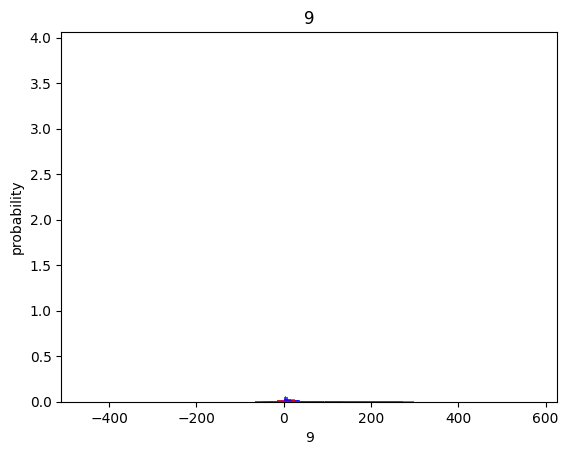

In [5]:
for label in cols[:-1]:
  plt.hist(df[df[10]==1][label], color='blue',label='gamma',alpha=0.7, density=True ) #density=True will normalise the data
  plt.hist(df[df[10]==0][label], color='red',label='hadron',alpha=0.7, density=True )
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  # plt.show()


In [6]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))]) #split data into training/validation and tetsing data

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale(dataf, over_sampling=False): #see other document for explaination
  x = dataf[dataf.columns[:-1]].values
  y = dataf[dataf.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)
  print(x)
  if over_sampling:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1,1))))
  return data,x,y

In [8]:
print(len(train[train[10]==1]))
print(len(train[train[10]==0]))

7384
4028


In [9]:
train , x_train, y_train = scale(train, True)
print(len(train))
print(len(x_train))
print(len(y_train))
print(sum(y_train==1))
print(sum(y_train==0))
valid , x_valid, y_valid = scale(valid, False)

test , x_test, y_test = scale(test, False)


[[-0.41267522 -0.05136519  0.42148269 ... -0.79308337 -0.8481138
  -0.52871909]
 [-0.21520877 -0.06486943  0.13113344 ... -0.58098944  0.3680602
   0.03353856]
 [-0.49796473 -0.28006596 -0.46071617 ... -0.38503178 -0.91341506
  -1.50043044]
 ...
 [-0.75701703 -0.84195553 -1.54931548 ...  0.30028039  0.29229186
   0.6477634 ]
 [-0.9646188  -0.57120744 -1.57182807 ... -0.43986812  1.79913764
  -0.56933188]
 [-0.61344651  0.18313409  0.03245677 ...  0.19107025  0.40737607
  -1.68096275]]
14768
14768
14768
7384
7384
[[ 0.16185804  0.11571031  1.15984414 ...  0.61786833 -0.74137942
   0.71566146]
 [ 0.70286308  0.75115826 -0.01764179 ...  1.19085743 -0.97901531
   2.03224314]
 [-0.81130973 -0.39116674 -0.76855097 ... -0.48485616 -0.53708315
   0.53426891]
 ...
 [ 0.55676624  1.01590793  1.57133567 ... -1.5715467  -0.38112741
   1.43484703]
 [-0.54443666 -0.29346705 -0.29755659 ...  0.65789315  1.81802121
   0.47734281]
 [-0.68224837 -0.53305141 -0.35119296 ... -0.43549542  0.488745
  -1.458

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred=knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1322
           1       0.86      0.86      0.86      2482

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [12]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model= nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1322
           1       0.74      0.90      0.81      2482

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.73      0.73      0.71      3804



In [19]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1322
           1       0.85      0.82      0.83      2482

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



In [ ]:
arr=[3,2,5,2,1,5]
heapq.heapify(arr)
while arr:
  print(heapq.heappop(arr))

1
2
2
3
5
5


In [ ]:
def func(b):
  a=15
  print(a,b)

  def inner():
    nonlocal a
    a=3
    c=9
    print(a+b+c)
  print(inner())
  print(a)


func(1)


15 1
13
None
3


In [ ]:
class MyClass:
  def __init__(self, nums):
    self.nums - nums
    self.size - len(nums)

  def getL(self):
    return self.size



-1


In [ ]:
print(10%3)

1


In [ ]:
print(-10&3)

2


In [ ]:
import math
print(math.floor(5/2))

2


In [ ]:
print(math.ceil(5/2))

3


In [ ]:
print(math.sqrt(4))

2.0


In [ ]:
print(math.pow(2,3))

8.0


In [ ]:
float("inf")

inf

In [ ]:
float("-inf")

-inf

In [ ]:
arr=[1,2,3]

In [ ]:
print(arr)

[1, 2, 3]


In [ ]:
arr.append(5)
print(arr)

[1, 2, 3, 5]


In [ ]:
arr.pop()

5

In [ ]:
arr.insert(0,5)

In [ ]:
print(arr)

[5, 1, 2, 3]


In [ ]:
print(arr[0])

5


In [ ]:
arr[0]=2
print(arr)

[2, 1, 2, 3]


In [ ]:
arr = [0]*7
print(arr)

[0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(arr[-1])

0


In [ ]:
print(arr[-2])

0


In [ ]:
arr[1:3]

[0, 0]

In [ ]:
print(arr[1:3])

[0, 0]


In [ ]:
arr1 = [1,2,5,3]
arr2 = [2,4,5]

# arr1.reverse()
# print(arr1)
# arr1.sort()
# print(arr1)
# arr1.reverse()
# print(arr1)
arr1.sort(reverse=True)
print(arr1)

[5, 3, 2, 1]


In [ ]:
for i in range(len(arr)):
  print(arr[i])

for i,n in enumerate(arr):
  print(i,n)

0
0
0
0
0
0
0
0 0
1 0
2 0
3 0
4 0
5 0
6 0
